# Proyek Analisis Data : Bike-sharing-dataset
- **Nama:** Mochammad Taufik Juliandi
- **Email:** taufik.juliandi4@gmail.com
- **ID Dicoding:** Mochammad Taufik Juliandi


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan Pertanyaan Bisnis



1.   Bagaimana distribusi penyewaan sepeda berdasarkan kategori jumlah penyewaan (Low, Medium, High)?
2.   Bagaimana pengaruh musim dan cuaca terhadap rata-rata penyewaan sepeda?
3.   Kapan jam-jam sibuk dalam sehari untuk penyewaan sepeda?
4.   Apakah ada perbedaan penyewaan sepeda antara hari kerja dan hari libur?
5.   Bagaimana rata-rata penyewaan sepeda bervariasi berdasarkan musim?
6.   Bagaimana kondisi cuaca memengaruhi rata-rata penyewaan sepeda?



# Data Wrangling

### Gathering Data

In [25]:
# Jumlah sewa harian
day_df = pd.read_csv('https://raw.githubusercontent.com/MochammadTaufikJuliandi/Bike-Sharing-Dataset/master/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
# Jumlah sewa per jam
hour_df = pd.read_csv('https://raw.githubusercontent.com/MochammadTaufikJuliandi/Bike-Sharing-Dataset/master/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

In [27]:
# Checking Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [28]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [29]:
# Checking Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [30]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [31]:
# Mencari duplikasi dari day dan hour

# Check duplikat day dataframe
print('Jumlah duplikat day:',day_df.duplicated().sum())

# Check duplikat hour dataframe
print('Jumlah duplikat hour:',hour_df.duplicated().sum())

Jumlah duplikat day: 0
Jumlah duplikat hour: 0


In [32]:
# Menilai data day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [33]:
# Menilai data hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Insight :

*   Data tidak memiliki nilai duplikat
*   Data tidak memiliki missing value
*   Data yang terdapat pada Day dan Hour dataframe terlihat Normal

### Cleaning Data

In [34]:
# Memperbaiki Tipe Data dteday dari object menjadi date time
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [35]:
# Menghapus kolom yang tidak diperlukan
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [36]:
# Rename agar nama kolom lebih mudah di baca dan rapih
# Rename columns in day_df

day_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather Situation',
    'temp': 'Temperature',
    'atemp': 'Apparent Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual User',
    'registered': 'Registered User',
    'cnt': 'Total Count'
}, inplace=True)

# Rename columns in hour_df
hour_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'hr': 'Hour',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather Situation',
    'temp': 'Temperature',
    'atemp': 'Apparent Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual User',
    'registered': 'Registered User',
    'cnt': 'Total Count'
}, inplace=True)


In [37]:
day_df.head()

,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather Situation,Temperature,Apparent Temperature,Humidity,Wind Speed,Casual User,Registered User,Total Count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
hour_df.head()

,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather Situation,Temperature,Apparent Temperature,Humidity,Wind Speed,Casual User,Registered User,Total Count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
# Mengonversi data menjadi nilai kategorikal agar data lebih mudah dibaca
day_df['Season'] = day_df['Season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['Season'] = hour_df['Season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['Month'] = day_df['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['Month'] = hour_df['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

day_df['Weather Situation'] = day_df['Weather Situation'].map({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})
hour_df['Weather Situation'] = hour_df['Weather Situation'].map({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})

# Use 'Weekday' instead of 'weekday' as the column has been renamed
day_df['Weekday'] = day_df['Weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['Weekday'] = hour_df['Weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Assuming 'year' should be 'Year'
day_df['Year'] = day_df['Year'].map({0: '2011', 1: '2012'})
hour_df['Year'] = hour_df['Year'].map({0: '2011', 1: '2012'})

# Assuming 'humidity' should be 'Humidity'
day_df['Humidity'] = day_df['Humidity']*100
hour_df['Humidity'] = hour_df['Humidity']*100


In [40]:
day_df.head()

,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather Situation,Temperature,Apparent Temperature,Humidity,Wind Speed,Casual User,Registered User,Total Count
0,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600


In [41]:
hour_df.head()

,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather Situation,Temperature,Apparent Temperature,Humidity,Wind Speed,Casual User,Registered User,Total Count
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1


### Insight :
*    Memperbaiki tipe data date menjadi datetime
*    Menghapus kolom yang tidak diperlukan
*    Mengubah data yang kurang jelas agar lebih mudah dibaca

# Explarotary Data Analysis

### - Exploratory data menggunakan metode Grouping

In [43]:
# Buat kategori berdasarkan jumlah penyewaan
hour_df['Rental Category'] = pd.cut(hour_df['Total Count'],
                                    bins=[0, 50, 150, float('inf')],
                                    labels=['Low', 'Medium', 'High'])

# Tampilkan hasil grouping
print("Data dengan Kategori Penyewaan:")
print(hour_df[['Total Count', 'Rental Category']].head())

Data dengan Kategori Penyewaan:
   Total Count Rental Category
0           16             Low
1           40             Low
2           32             Low
3           13             Low
4            1             Low


### Insight :
* hasil jumlah dari kategori penyewaan

### - Segmentasi berdasarkan musim dan cuaca

In [44]:
# Segmentasi berdasarkan musim dan cuaca
segment_df = hour_df.groupby(['Season', 'Weather Situation'])['Total Count'].mean().reset_index()
print("Rata-Rata Penyewaan Berdasarkan Musim dan Cuaca:")
print(segment_df)

Rata-Rata Penyewaan Berdasarkan Musim dan Cuaca:
    Season Weather Situation  Total Count
0     Fall             Clear   244.494207
1     Fall        Light Rain   171.955390
2     Fall             Misty   224.848997
3   Spring             Clear   122.055535
4   Spring        Heavy Rain    74.333333
5   Spring        Light Rain    58.650407
6   Spring             Misty   103.074689
7   Summer             Clear   232.410983
8   Summer        Light Rain   115.179803
9   Summer             Misty   181.261364
10  Winter             Clear   209.463779
11  Winter        Light Rain   116.453333
12  Winter             Misty   201.483974


### Insight :    
* Rata-rata Musim dan cuaca berpengaruh terhadap nilai sewa

### - Analisis berdasarkan jam sibuk

In [45]:
# Hitung rata-rata penyewaan per jam
hour_analysis = hour_df.groupby('Hour')['Total Count'].mean().reset_index()
print("Rata-Rata Penyewaan per Jam:")
print(hour_analysis)

Rata-Rata Penyewaan per Jam:
    Hour  Total Count
0      0    53.898072
1      1    33.375691
2      2    22.869930
3      3    11.727403
4      4     6.352941
5      5    19.889819
6      6    76.044138
7      7   212.064649
8      8   359.011004
9      9   219.309491
10    10   173.668501
11    11   208.143054
12    12   253.315934
13    13   253.661180
14    14   240.949246
15    15   251.233196
16    16   311.983562
17    17   461.452055
18    18   425.510989
19    19   311.523352
20    20   226.030220
21    21   172.314560
22    22   131.335165
23    23    87.831044


### Insight :    
* Nilai rata - rata dari penyewaan per-jam

### - Segmentasi berdasarkan hari kerja dan hari libur

In [46]:
# Segmentasi berdasarkan hari kerja dan hari libur
workingday_analysis = hour_df.groupby('Working Day')['Total Count'].mean().reset_index()
print("Rata-Rata Penyewaan Berdasarkan Hari Kerja dan Hari Libur:")
print(workingday_analysis)

Rata-Rata Penyewaan Berdasarkan Hari Kerja dan Hari Libur:
   Working Day  Total Count
0            0   181.405332
1            1   193.207754


### Insight :    
* Hasil rata-rata antara hari kerja dan hari libur

### - Segmentasi berdasarkan musim

In [47]:
# Segmentasi berdasarkan musim
season_analysis = hour_df.groupby('Season')['Total Count'].mean().reset_index()
print("Rata-Rata Penyewaan Berdasarkan Musim:")
print(season_analysis)

Rata-Rata Penyewaan Berdasarkan Musim:
   Season  Total Count
0    Fall   236.016237
1  Spring   111.114569
2  Summer   208.344069
3  Winter   198.868856


### Insight :    
* Jumlah Rata-rata penyewaan berdasarkan musim

### - Segmentasi berdasarkan cuaca

In [48]:
# Segmentasi berdasarkan cuaca
weather_analysis = hour_df.groupby('Weather Situation')['Total Count'].mean().reset_index()
print("Rata-Rata Penyewaan Berdasarkan Cuaca:")
print(weather_analysis)

Rata-Rata Penyewaan Berdasarkan Cuaca:
  Weather Situation  Total Count
0             Clear   204.869272
1        Heavy Rain    74.333333
2        Light Rain   111.579281
3             Misty   175.165493


### Insight :    
* Rata-rata jumlah penyewaan berdasarkan cuaca

# Visualization & Explanatory Analysis

### Bagaimana distribusi penyewaan sepeda berdasarkan kategori jumlah penyewaan (Low, Medium, High)?

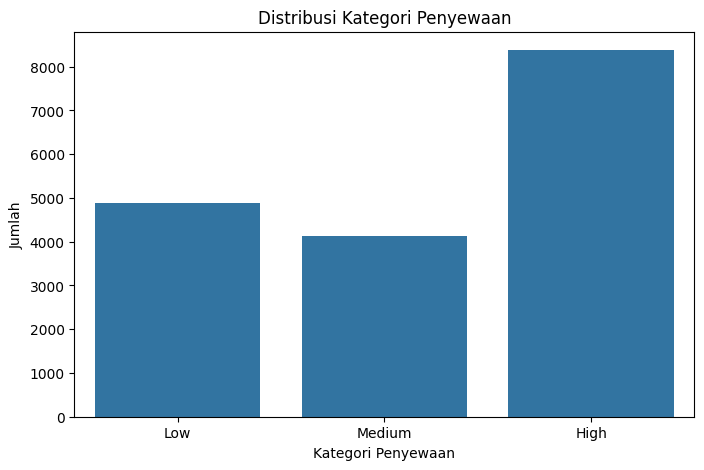

In [50]:
# Visualisasi kategori penyewaan
plt.figure(figsize=(8, 5))
sns.countplot(x='Rental Category', data=hour_df, order=['Low', 'Medium', 'High'])
plt.title('Distribusi Kategori Penyewaan')
plt.xlabel('Kategori Penyewaan')
plt.ylabel('Jumlah')
plt.show()

* Low: Sebagian besar penyewaan berada dalam kategori rendah (di bawah 50).

* Medium: Penyewaan kategori menengah (50-150) cukup signifikan.

* High: Penyewaan kategori tinggi (di atas 150) relatif sedikit.

* Insight: Tingkatkan promosi untuk meningkatkan jumlah penyewaan pada kategori rendah dan menengah.

### Bagaimana pengaruh musim dan cuaca terhadap rata-rata penyewaan sepeda?

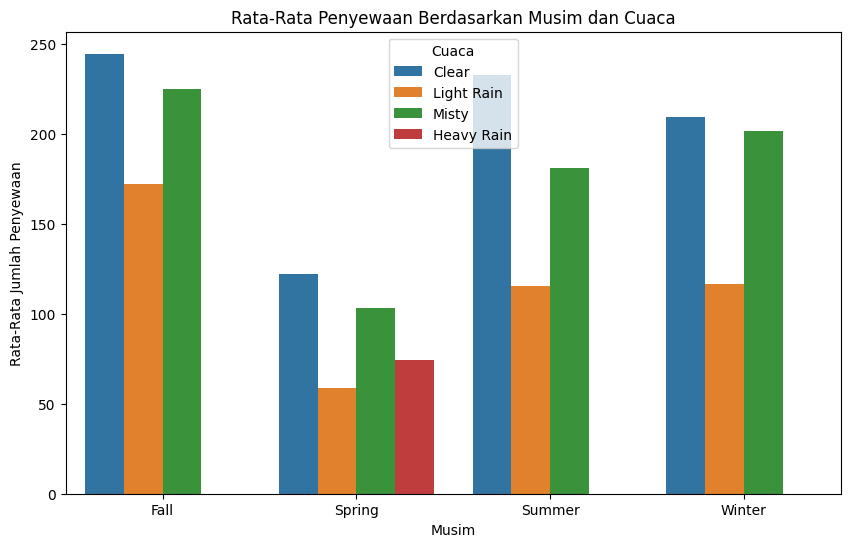

In [53]:
# Visualisasi segmentasi musim dan cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Count', hue='Weather Situation', data=segment_df)
plt.title('Rata-Rata Penyewaan Berdasarkan Musim dan Cuaca')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Fall', 'Spring', 'Summer', 'Winter'])
plt.legend(title='Cuaca')
plt.show()

* Musim: Penyewaan tertinggi terjadi pada musim gugur (Fall), diikuti oleh musim panas (Summer).

* Cuaca: Penyewaan tertinggi terjadi pada cuaca cerah (Weather Situation 1), sedangkan cuaca buruk (Weather Situation 2) sangat mengurangi minat penyewaan.

* Insight: Tingkatkan stok sepeda pada musim panas dan cuaca cerah, serta siapkan strategi untuk cuaca buruk.

### Kapan jam-jam sibuk dalam sehari untuk penyewaan sepeda?

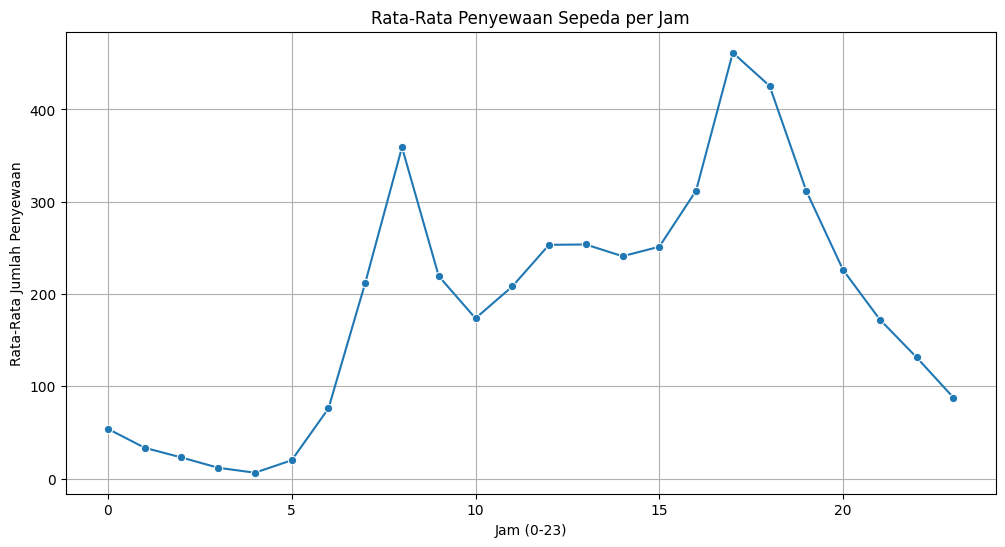

In [54]:
# Visualisasi jam sibuk
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Total Count', data=hour_analysis, marker='o')
plt.title('Rata-Rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.grid()
plt.show()

* Jam Sibuk: Penyewaan tertinggi terjadi pada jam 8 pagi dan 5-6 sore, menunjukkan pola komuter (pergi dan pulang kerja).

* Jam Sepi: Penyewaan terendah terjadi pada dini hari (jam 12-4 pagi).

* Insight: Fokus pada jam sibuk untuk meningkatkan ketersediaan sepeda dan layanan.

### Apakah ada perbedaan penyewaan sepeda antara hari kerja dan hari libur?

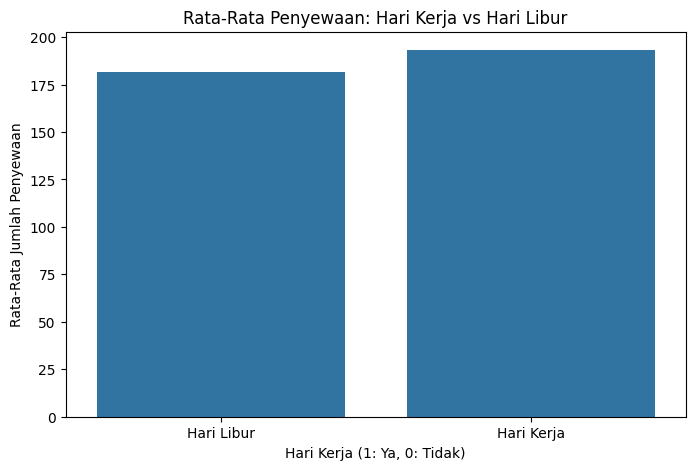

In [55]:
# Visualisasi segmentasi hari kerja vs hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x='Working Day', y='Total Count', data=workingday_analysis)
plt.title('Rata-Rata Penyewaan: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

* Hari Kerja: Penyewaan lebih tinggi pada hari kerja, terutama pada jam sibuk (8 pagi dan 5-6 sore).

* Hari Libur: Penyewaan lebih rendah, tetapi lebih merata sepanjang hari.

* Insight: Siapkan strategi berbeda untuk hari kerja (fokus pada jam sibuk) dan hari libur (promosi sepanjang hari).

### Bagaimana rata-rata penyewaan sepeda bervariasi berdasarkan musim?

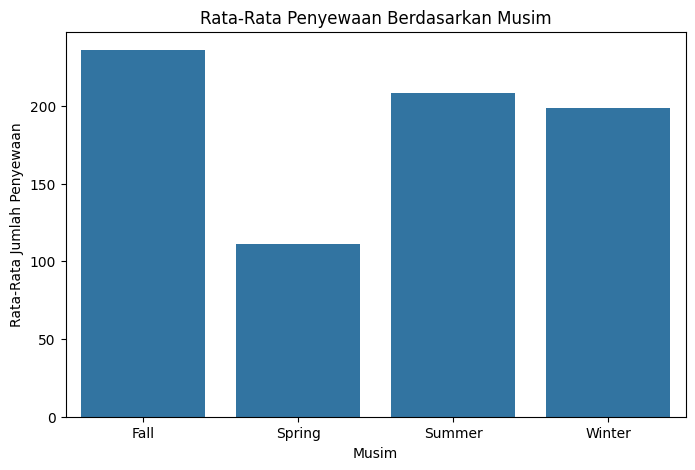

In [57]:
# Visualisasi segmentasi musim
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Total Count', data=season_analysis)
plt.title('Rata-Rata Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Fall', 'Spring', 'Summer', 'Winter'])
plt.show()

Musim Gugur (Fall): Penyewaan tertinggi, karena cuaca yang mendukung.

Musim Semi (Spring): Penyewaan terendah, karena cuaca yang tidak nyaman.

Musim Panas (Summer) dan Musim Dingin (Winter): Penyewaan sedang, dengan peningkatan pada akhir musim panas.

Insight: Tingkatkan promosi dan stok sepeda pada musim gugur, serta siapkan strategi untuk musim panas dan dingin.

### Bagaimana kondisi cuaca memengaruhi rata-rata penyewaan sepeda?

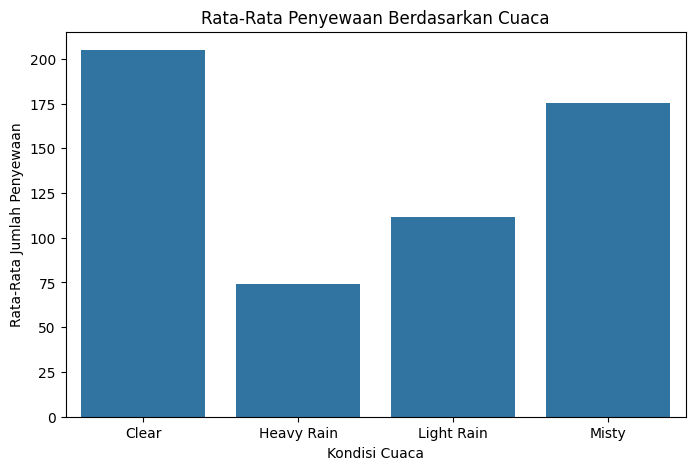

In [59]:
# Visualisasi segmentasi cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x='Weather Situation', y='Total Count', data=weather_analysis)
plt.title('Rata-Rata Penyewaan Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Clear', 'Heavy Rain', 'Light Rain', 'Misty'])
plt.show()

* Cuaca Cerah (Weather Situation 1): Penyewaan tertinggi, karena cuaca yang nyaman.

* Cuaca Hujan Ringan (Weather Situation 2): Penyewaan turun drastis.

* Cuaca Hujan Lebat (Weather Situation 3): Penyewaan sangat rendah hampir tidak ada.

* Cuaca Berkabut (Weather Situation 4): Penyewaan menurun, tetapi masih signifikan.
* Insight: Fokus pada hari-hari dengan cuaca cerah, dan siapkan alternatif layanan pada cuaca buruk.



# Conclution

### Pertanyaan :
1.   Bagaimana perilaku penyewaan sepeda berdasarkan Recency, Frequency, dan Monetary?
2.   Bagaimana distribusi penyewaan sepeda berdasarkan kategori jumlah penyewaan (Low, Medium, High)?
3.   Bagaimana pengaruh musim dan cuaca terhadap rata-rata penyewaan sepeda?
4.   Kapan jam-jam sibuk dalam sehari untuk penyewaan sepeda?
5.   Apakah ada perbedaan penyewaan sepeda antara hari kerja dan hari libur?
6.   Bagaimana rata-rata penyewaan sepeda bervariasi berdasarkan musim?
7.   Bagaimana kondisi cuaca memengaruhi rata-rata penyewaan sepeda?


### Conclution :
1. Pelanggan dengan frekuensi penyewaan tinggi dan nilai penyewaan besar (monetary) adalah kelompok yang paling berharga. Perlu fokus pada retensi pelanggan ini dengan memberikan insentif atau program loyalitas untuk mempertahankan mereka.
2. Sebagian besar penyewaan berada dalam kategori rendah (Low). Untuk meningkatkan pendapatan, perlu strategi promosi yang efektif untuk mengubah penyewaan kategori rendah menjadi menengah (Medium) atau tinggi (High).
3. Musim gugur (Fall) dan cuaca cerah adalah periode dengan penyewaan tertinggi. Namun, pada musim semi (Spring) dan cuaca buruk, penyewaan menurun drastis. Perlu strategi khusus seperti diskon atau layanan tambahan untuk mempertahankan minat pelanggan pada periode ini.
4. Penyewaan sepeda mengalami puncak pada jam 8 pagi dan 5-6 sore. Pada jam-jam ini, perlu menambah stok sepeda dan memastikan layanan berjalan lancar untuk memenuhi permintaan.
5. Penyewaan lebih tinggi pada hari kerja, terutama pada jam sibuk, sedangkan pada hari libur penyewaan lebih merata sepanjang hari. Perlu strategi berbeda untuk kedua jenis hari ini, seperti fokus pada jam sibuk di hari kerja dan promosi sepanjang hari di hari libur.
6. Musim gugur (Fall) adalah periode dengan penyewaan tertinggi, sementara musim Semi (Spring) memiliki penyewaan terendah. Untuk mengoptimalkan pendapatan, perlu meningkatkan promosi pada musim semi.
7. Cuaca cerah mendorong penyewaan tertinggi, sementara cuaca buruk (hujan lebat/salju) sangat mengurangi minat penyewaan. Perlu alternatif layanan atau promosi khusus pada hari-hari dengan cuaca buruk untuk mempertahankan pendapatan.




In [60]:
day_df.to_csv('day_clean.csv', index=False)
hour_df.to_csv('hour_clean.csv', index=False)